# Abalones

### Cargamos Dataset


In [ ]:
from google.colab import drive
from shapely.geometry import Point
drive.mount('/content/drive',force_remount=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
db=pd.read_csv("/content/drive/My Drive/abalone.csv")

Mounted at /content/drive


In [ ]:
db.head()

,sex,length,diameter,height,wholeWeight,shrunkedWeight,visceraWeight,shellWeight,rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
db["sex"].replace({"M": 0, "F": 1, "I":2}, inplace=True)

TypeError: ignored

In [ ]:
db.describe()

,sex,length,diameter,height,wholeWeight,shrunkedWeight,visceraWeight,shellWeight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
db.dtypes

sex                 int64
length            float64
diameter          float64
height            float64
wholeWeight       float64
shrunkedWeight    float64
visceraWeight     float64
shellWeight       float64
rings               int64
dtype: object

In [ ]:
db = db[db.sex != 2]

In [ ]:
y = db['sex']
X = db[['length', 'diameter', 'height', 'wholeWeight', 'shrunkedWeight', 'visceraWeight', 'shellWeight', 'rings']]

In [ ]:
y = db['sex']
X = db[['wholeWeight', 'shrunkedWeight', 'visceraWeight', 'shellWeight']]

In [ ]:
y = db['sex']
X = db[['wholeWeight','shrunkedWeight']]

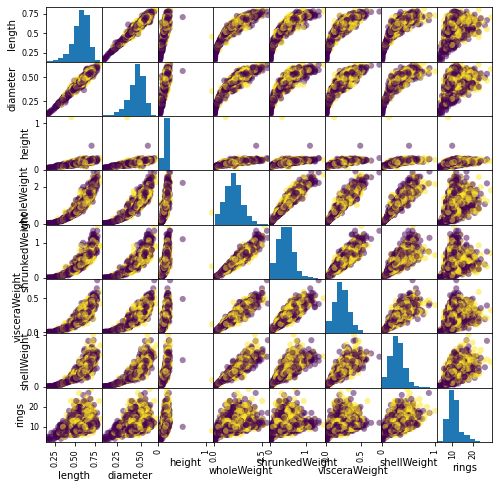

In [ ]:
_ = pd.plotting.scatter_matrix(X, c = y , figsize=[8,8], s=150)

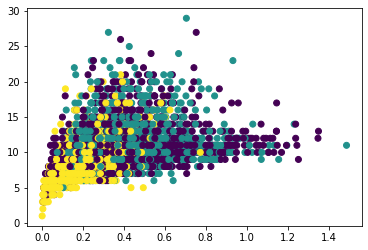

In [ ]:
plt.scatter(db['shrunkedWeight'], db['rings'], c = db['sex'])

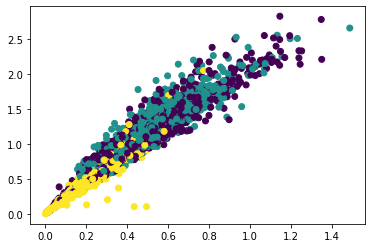

In [ ]:
plt.scatter(db['shrunkedWeight'], db['wholeWeight'], c = db['sex'])

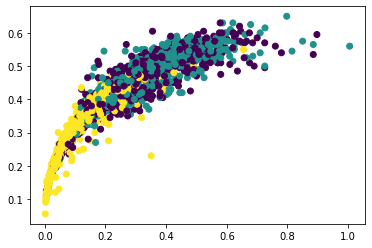

In [ ]:
plt.scatter(db['shellWeight'], db['diameter'], c = db['sex'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
dt = DecisionTreeClassifier(criterion='entropy', random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.5202821869488536

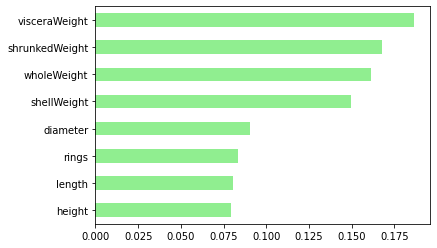

In [ ]:
## Importancias
import pandas as pd
import matplotlib.pyplot as plt

#Create Series fo features importances
importances_rf = pd.Series(dt.feature_importances_, index = X.columns)

#Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

#Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.show()

[Text(140.56314221203706, 214.33371428571428, 'X[2] <= 0.102\nentropy = 0.995\nsamples = 2268\nvalue = [1227, 1041]'),
 Text(10.7963721867652, 208.12114285714284, 'X[3] <= 0.139\nentropy = 0.73\nsamples = 152\nvalue = [121, 31]'),
 Text(8.996976822304333, 201.90857142857143, 'X[4] <= 0.031\nentropy = 0.179\nsamples = 37\nvalue = [36, 1]'),
 Text(8.0972791400739, 195.696, 'X[1] <= 0.188\nentropy = 0.414\nsamples = 12\nvalue = [11, 1]'),
 Text(7.197581457843467, 189.48342857142856, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(8.996976822304333, 189.48342857142856, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(9.896674504534767, 195.696, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(12.595767551226066, 201.90857142857143, 'X[5] <= 0.028\nentropy = 0.828\nsamples = 115\nvalue = [85, 30]'),
 Text(11.696069868995634, 195.696, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(13.4954652334565, 195.696, 'X[1] <= 0.233\nentropy = 0.797\nsamples = 112\nvalue = [85, 2

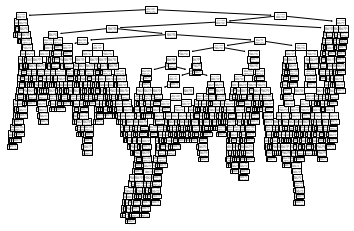

In [ ]:
tree.plot_tree(dt)

In [ ]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


In [ ]:
#Voting classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

SEED = 1 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=SEED)

lr = LogisticRegression(random_state=SEED)
knn = KNN(n_neighbors=27)
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

classifiers = [('Logistic Regression', lr),
               ('K Nearest Neighbours', knn),
               ('Classification Tree', dt)]
aux = [lr,knn,dt]

for clf_name in aux:
  clf_name.fit(X_train, y_train)
  y_pred = clf_name.predict(X_test)
  print('{:.3f}'.format(accuracy_score(y_test, y_pred)))

#Voting classifier
vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))

0.541
0.532
0.509
Voting Classifier: 0.524


## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=SEED)

dt = DecisionTreeClassifier(max_depth =4, min_samples_leaf=0.16, random_state=SEED)
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1, oob_score=True)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.532


In [ ]:
print(bc.oob_score_)

0.53125


## Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

SEED = 1

#400 Regression trees and each leaf has at least 12% of data
rf = RandomForestClassifier(n_estimators = 200,
                            max_features = 'sqrt',
                           random_state=SEED)

rf.fit(X_train, y_train)
#Predict the test set lables 
y_pred = rf.predict(X_test)
#Evaluate the test set RMSE
accuracy = accuracy_score(y_test, y_pred)
#Print the test set RMSE
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.56


## AdaBoost

In [ ]:
#Usamos un AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    stratify=y, 
                                                    random_state=SEED)

dt = DecisionTreeClassifier(max_depth = 1, random_state=SEED)

adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators = 100)

adb_clf.fit(X_train, y_train)
#Predecir el test set of probabilities of positive cases. 
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]

#adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

#print('ROC AUC score:{:.2f}'.format(adb_clf_roc_auc_score))
print(accuracy_score(y_test, y_pred))

0.5593419506462984


## Tunning Hyperparams


In [ ]:
# Inspect Hyperparameters of a CART

from sklearn.tree import DecisionTreeClassifier

SEED = 1

dt = DecisionTreeClassifier(random_state=SEED)

print(dt.get_params())  #Gives dict 

from sklearn.model_selection import GridSearchCV

params_dt = {
              'max_depth': [1,2,3,4,5,6,7,8,9,10,1000],
              'min_samples_leaf': [0.1,0.09,0.08,0.11],
              'max_features': ['log2','sqrt']
            }

grid_dt = GridSearchCV(estimator=dt,
                       param_grid= params_dt,
                       verbose = 1,
                       scoring= 'accuracy',
                       cv=20,
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)

best_hyperparams = grid_dt.best_params_

best_CV_score = grid_dt.best_score_

best_model = grid_dt.best_estimator_

test_acc = best_model.score(X_test, y_test)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 1, 'splitter': 'best'}
Fitting 20 folds for each of 11 candidates, totalling 220 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:    2.4s finished


In [ ]:
print(test_acc)

0.55103668261563


In [ ]:
best_hyperparameters

{'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'n_estimators': 400}